# 4. 使用 Keras 构建神经网络进行分类 - 印度糖尿病的例子

在这篇文章中，我们将逐步学习使用 keras 库构建神经网络进行分类的方法。

![ls1QvZ](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ls1QvZ.jpg)

# [什么是 Keras？Why Keras](https://keras.io/why_keras/)

* Keras 是一个用 Python 编写的高级神经网络 API(high-level neural network API)。
* 它能够在 Tensorflow、CNTK 或 Theano 之上(on top of)运行。
* Keras 可以用作深度学习库。支持卷积(Convolutional)和递归神经网络(Recurrent Neural Networks)
* 使用 Keras 进行原型制作(Prototyping)既快速又简单
* 在 CPU 和 GPU 上无缝运行

## 一个简单的二分类神经网络

我们将构建一个用于二进制分类的神经网络。

对于二元分类，我们将使用 [Pima Indians 糖尿病数据库](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)进行二元分类。

有 768 个观测值，有 8 个输入变量和 1 个输出变量。

变量名称如下：
* 怀孕(pregnant)的次数。
* 口服葡萄糖耐量试验中 2 小时的血浆葡萄糖浓度/Plasma glucose concentration a 2 hours in an oral glucose tolerance test。
* 舒张压/Diastolic blood pressure  (mm Hg)。
* 三头肌皮褶厚度/Triceps skinfold thickness（mm）。
* 2 小时血清胰岛素/2-Hour serum insulin (mu U/ml)。
* 体重指数/Body mass index（体重公斤/（身高米）²）。
* 糖尿病谱系功能/Diabetes pedigree function。
* 年龄/Age（岁）。
* 类变量/Class variable（0 或 1）。

我们将首先导入基本库 -pandas 和 numpy 以及数据可视化库 matplotlib 和 seaborn。其他库将在使用时导入。

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2022-04-17 04:45:38--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2022-04-17 04:45:38 (26.5 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [100]:
!pwd
!ls

/content
Alibaba-PuHuiTi-Medium.ttf	sample_data		      typeface.ttf
pima-indians-diabetes.data.csv	TaipeiSansTCBeta-Regular.ttf


我们现在将读取文件并将数据加载到 DataFrame 数据集中

In [101]:
dataset = pd.read_csv('./pima-indians-diabetes.data.csv')
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [102]:
# names=['Pregnant Times','Plasma glucose','Diastolic blood pressure','Triceps skinfold thickness','Serum insulin','Body mass index','Diabetes pedigree function','Age','Class']
dataset = pd.read_csv('./pima-indians-diabetes.data.csv',header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
names=['Pregnant Times','Plasma glucose','Diastolic blood pressure','Triceps skinfold thickness','Serum insulin','Body mass index','Diabetes pedigree function','Age','Class']
dataset = pd.read_csv('./pima-indians-diabetes.data.csv',header=None,names = names)

为了更好地理解数据，让我们查看数据集的详细信息。我们需要了解列以及与每列关联的数据类型。

In [104]:
dataset.head(2)

,Pregnant Times,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,Serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


![uwe7C9](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/uwe7C9.jpg)

In [105]:
dataset.describe(include='all')

,Pregnant Times,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,Serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


![EPsJE1](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/EPsJE1.jpg)

我们可以看到所有特征都是数字的，没有任何分类数据。由于我们没有任何分类变量，我们不需要分类变量的任何数据转换。

我们将数据可视化以便更好地理解。我们使用 **seaborn pairplot** 绘制数据，使用属性 `hue` 将两个类以不同的颜色绘制。

让我们来看看 鸾尾花的 例子中 sns pairplot 的用法

In [106]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})

#导入seaborn自带iris数据集
data=sns.load_dataset("iris")  
#为了方便大家观看，把列名换成中文的
data.rename(columns={"sepal_length":"萼片长",
                     "sepal_width":"萼片宽",
                     "petal_length":"花瓣长",
                     "petal_width":"花瓣宽",
                     "species":"种类"},inplace=True)
kind_dict = {
    "setosa":"山鸢尾",
    "versicolor":"杂色鸢尾",
    "virginica":"维吉尼亚鸢尾"
}
data["种类"] = data["种类"].map(kind_dict)
data.head() #数据集的内容如下

,萼片长,萼片宽,花瓣长,花瓣宽,种类
0,5.1,3.5,1.4,0.2,山鸢尾
1,4.9,3.0,1.4,0.2,山鸢尾
2,4.7,3.2,1.3,0.2,山鸢尾
3,4.6,3.1,1.5,0.2,山鸢尾
4,5.0,3.6,1.4,0.2,山鸢尾


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23485 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_text(s, 0.0, flag

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 33852 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29255 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38271 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23485 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29923 missing from current font.
  font.set_text(s, 0,

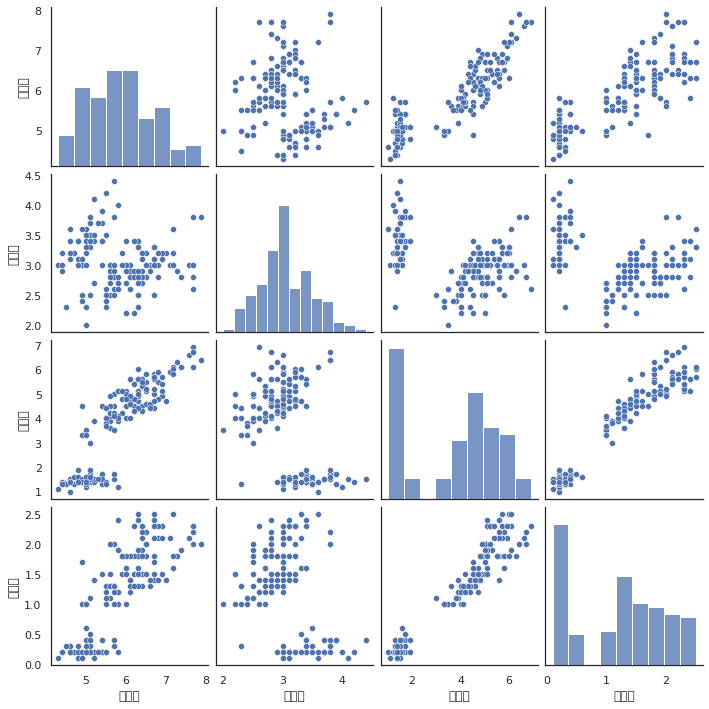

In [107]:
sns.pairplot(data)

--2022-04-17 07:48:33--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.139, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pijsotd7v0mv1nu4r7c2jg45s0bt6r7e/1650181650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-17 07:48:33--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pijsotd7v0mv1nu4r7c2jg45s0bt6r7e/1650181650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125.195.132

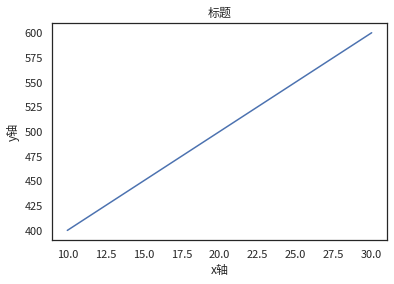

In [108]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

plt.plot((10,20,30),(400,500,600)) 
plt.title("标题") 
plt.ylabel("y轴") 
plt.xlabel("x轴")  
plt.show()

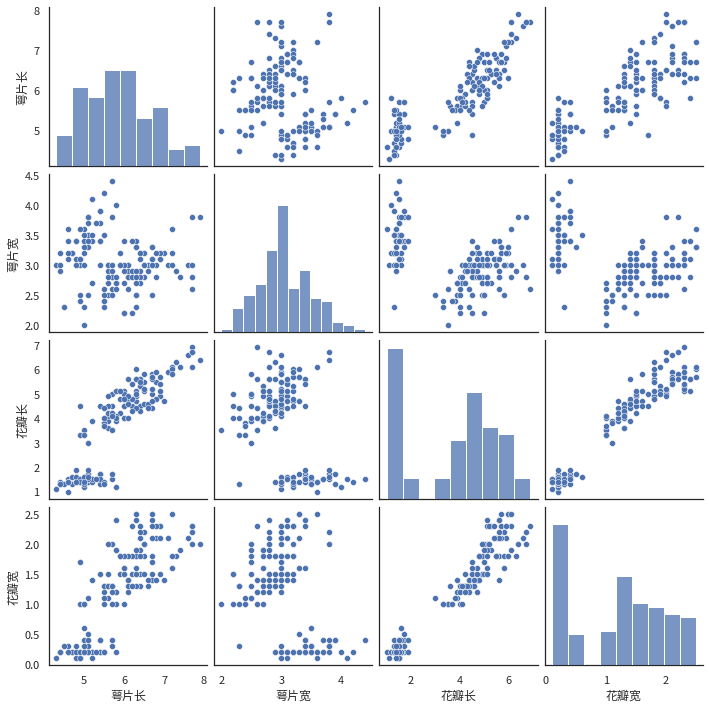

In [109]:
sns.pairplot(data)

可以看到**对角线上**是**各个属性的直方图（分布图）**，而**非对角线上**是**两个不同属性之间的相关图**，从图中我们发现，花瓣的长度和宽度之间以及萼片的长短和花瓣的长、宽之间具有比较明显的相关关系。

`kind`：用于控制非对角线上的图的类型，可选`"scatter"`与`"reg"`

`diag_kind`：控制对角线上的图的类型，可选`"hist"`与`"kde"`

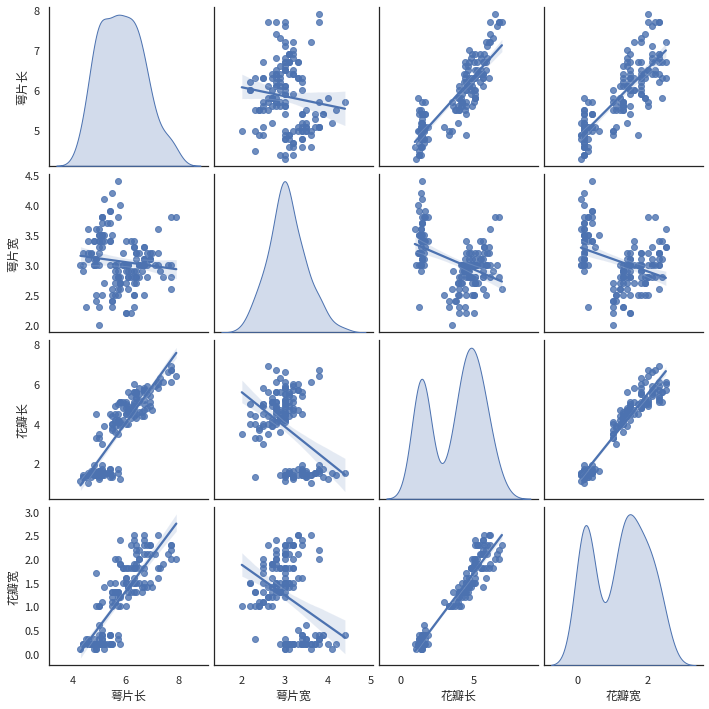

In [110]:
sns.pairplot(data,kind="reg",diag_kind="kde")

将 `kind` 参数设置为 `"reg"` 会为非对角线上的散点图拟合出一条回归直线，更直观地显示变量之间的关系。

那对于不同种类的花，其花萼和花瓣有什么比较鲜明的特征吗？我们通过`hue`参数把不同种类的花区分开，进行进一步分析。

`hue` ：针对某一字段进行分类

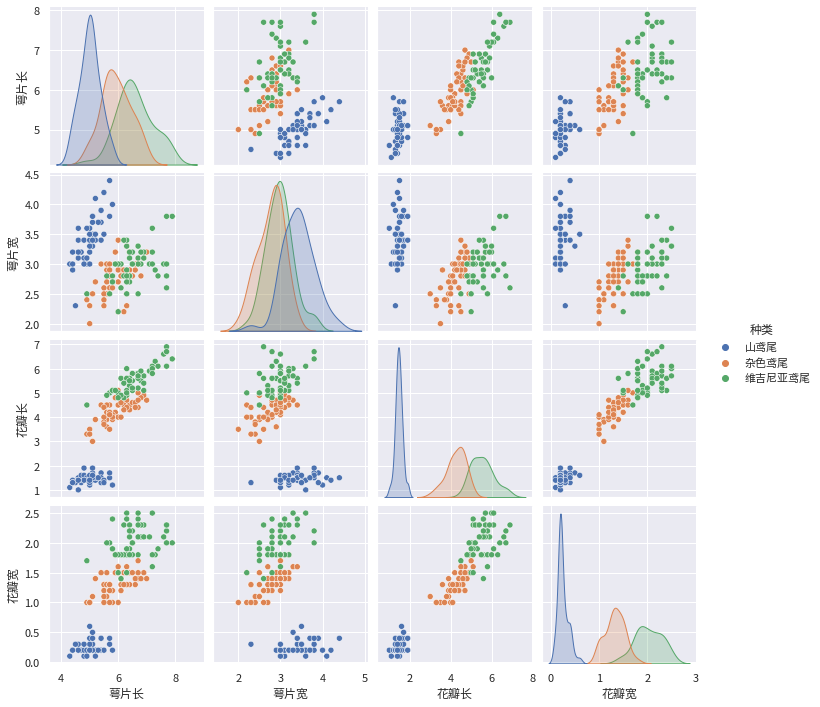

In [64]:
#不同类别的点会以不同的颜色显现出来
sns.pairplot(data,hue="种类") 

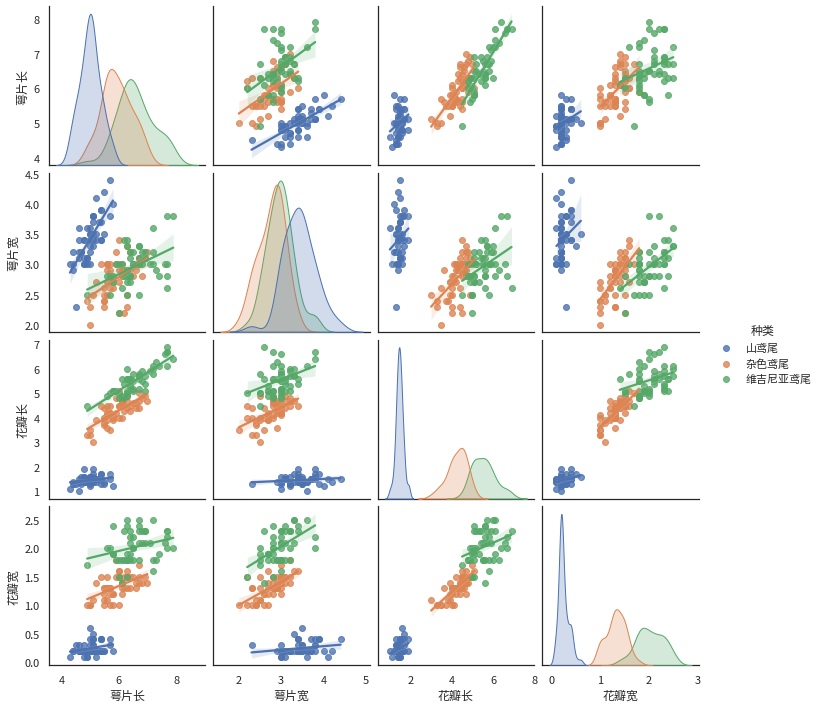

In [111]:
#不同类别的点会以不同的颜色显现出来
sns.pairplot(data,kind='reg',hue="种类") 

我们可以从经过hue分类后的pairplot中发现，不论是从对角线上的分布图还是从分类后的散点图，都可以看出对于不同种类的花，其萼片长、花瓣长、花瓣宽的分布差异较大，换句话说，这些属性是可以帮助我们去识别不同种类的花的。

比如，
* 对于萼片长度较短，花瓣宽度较窄的花，那么它大概率是山鸢尾。
* 对于花瓣长度较短，花瓣宽度较窄的花，那么它大概率是山鸢尾。

当然，可以通过 palette 参数来调出自己想要的颜色

palette：控制色调

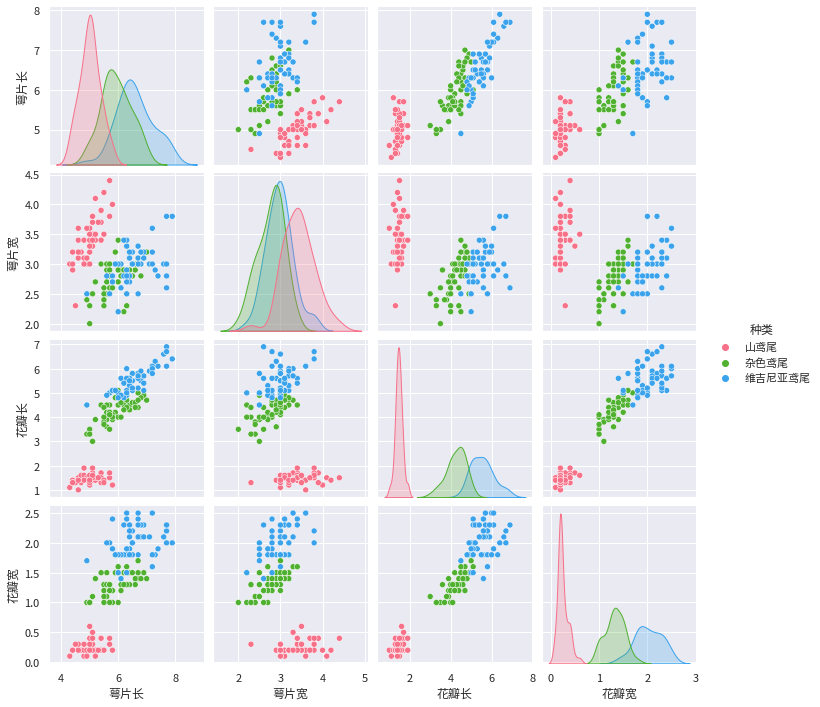

In [65]:
sns.pairplot(data,hue="种类",palette="husl")

markers：控制散点的样式
![8TagLc](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/8TagLc.png)

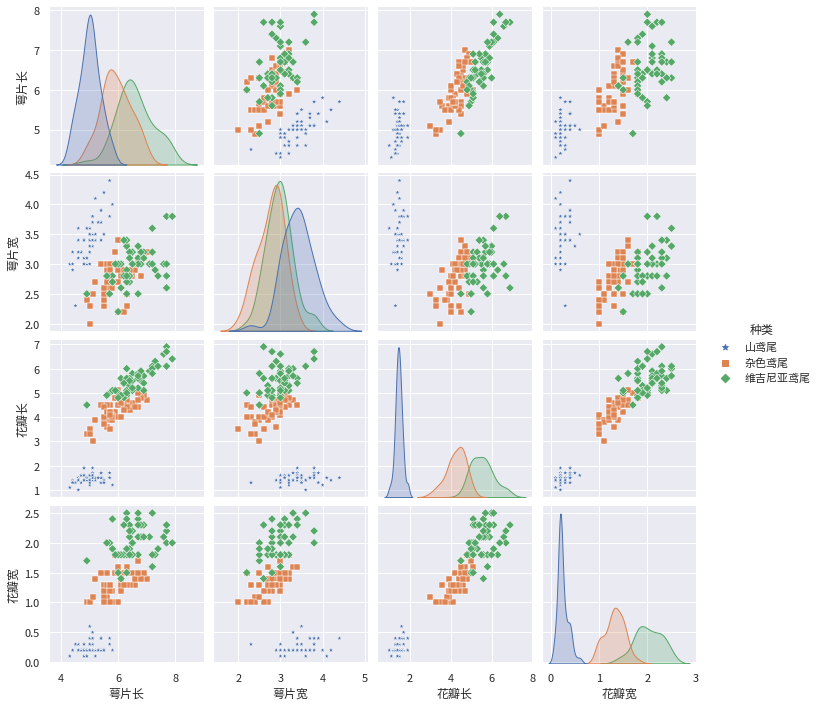

In [68]:
sns.pairplot(data,hue="种类",markers=["*", "s", "D"])

当我们想单独研究某两个（或多个）变量的关系时，我们只需要通过vars参数指定你想研究的变量

vars,x_vars,y_vars：选择数据中的特定字段，以list形式传入

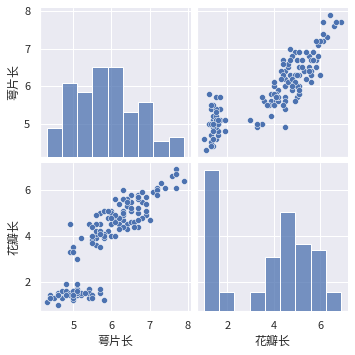

In [69]:
#单独用vars参数选择"萼片长 "和"花瓣长"两种属性
sns.pairplot(data,vars=["萼片长","花瓣长"]) 

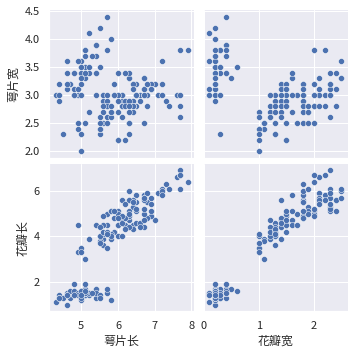

In [70]:
# 用x_vars和 y_vars参数指定
# 需要注意的是，x_vars和y_vars要同时指定
sns.pairplot(data,x_vars=["萼片长","花瓣宽"],
             y_vars=["萼片宽","花瓣长"]) 

更多的样式可以通过plot_kws和diag_kws来进行控制

plot_kws：用于控制非对角线上的图的样式

diag_kws：用于控制对角线上图的样式

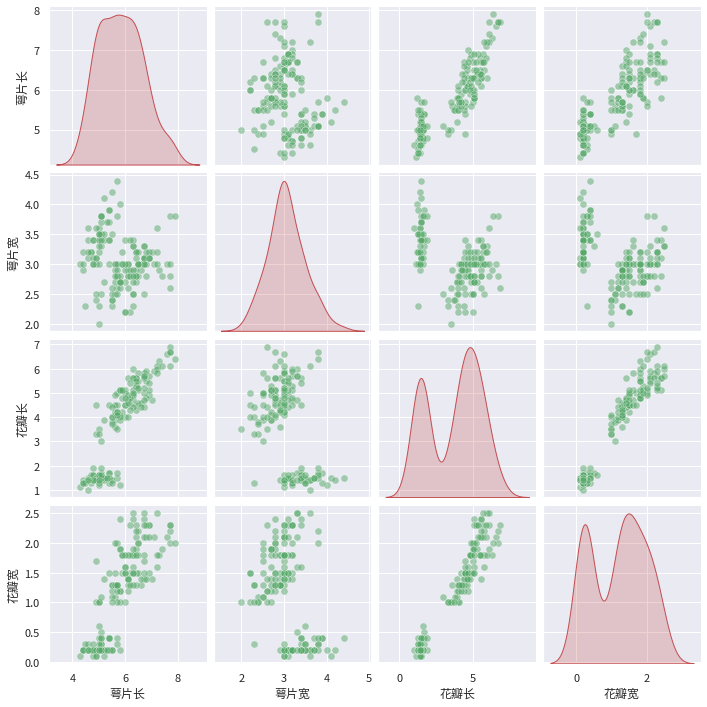

In [71]:
sns.pairplot(data,diag_kind="kde",
             plot_kws=dict(s=50,edgecolor="w",color="g",alpha=.5),
             diag_kws=dict(shade=True,color="r")) 

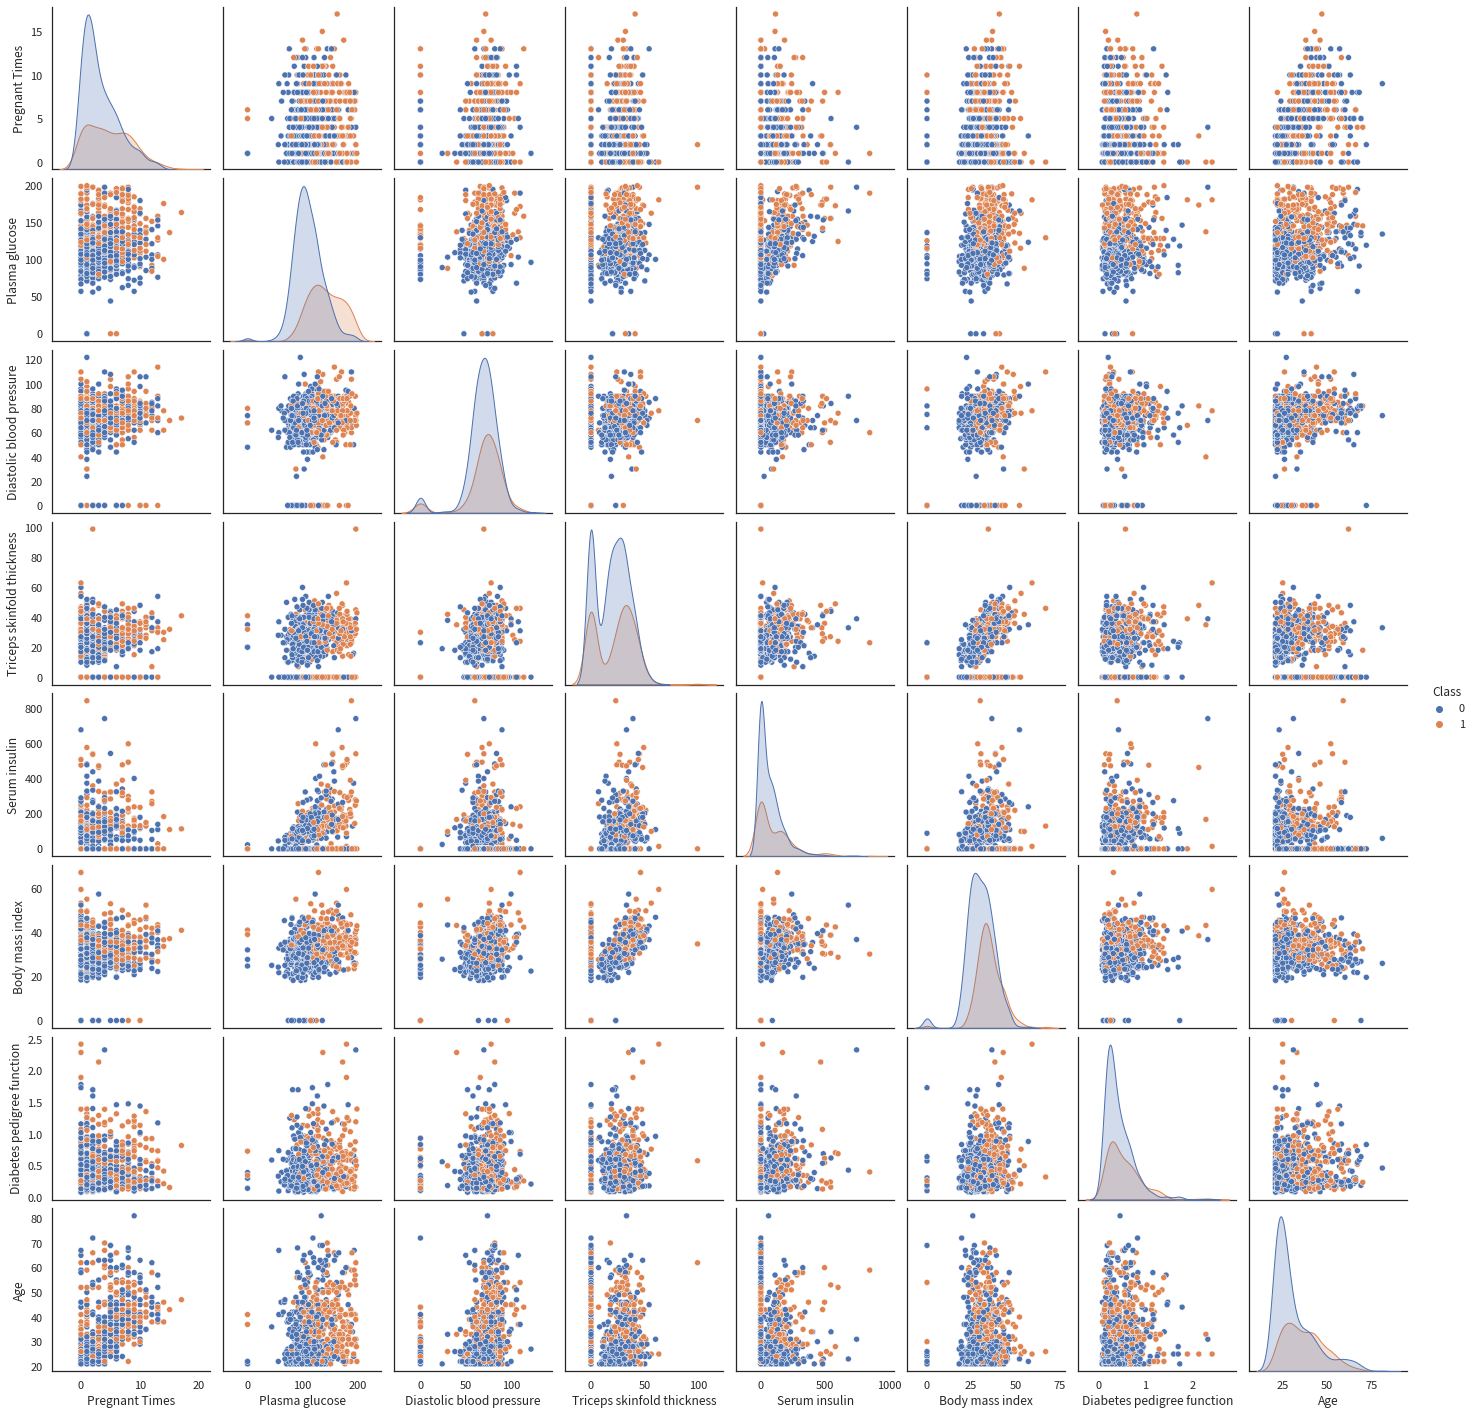

In [112]:
sns.pairplot(dataset, hue='Class')

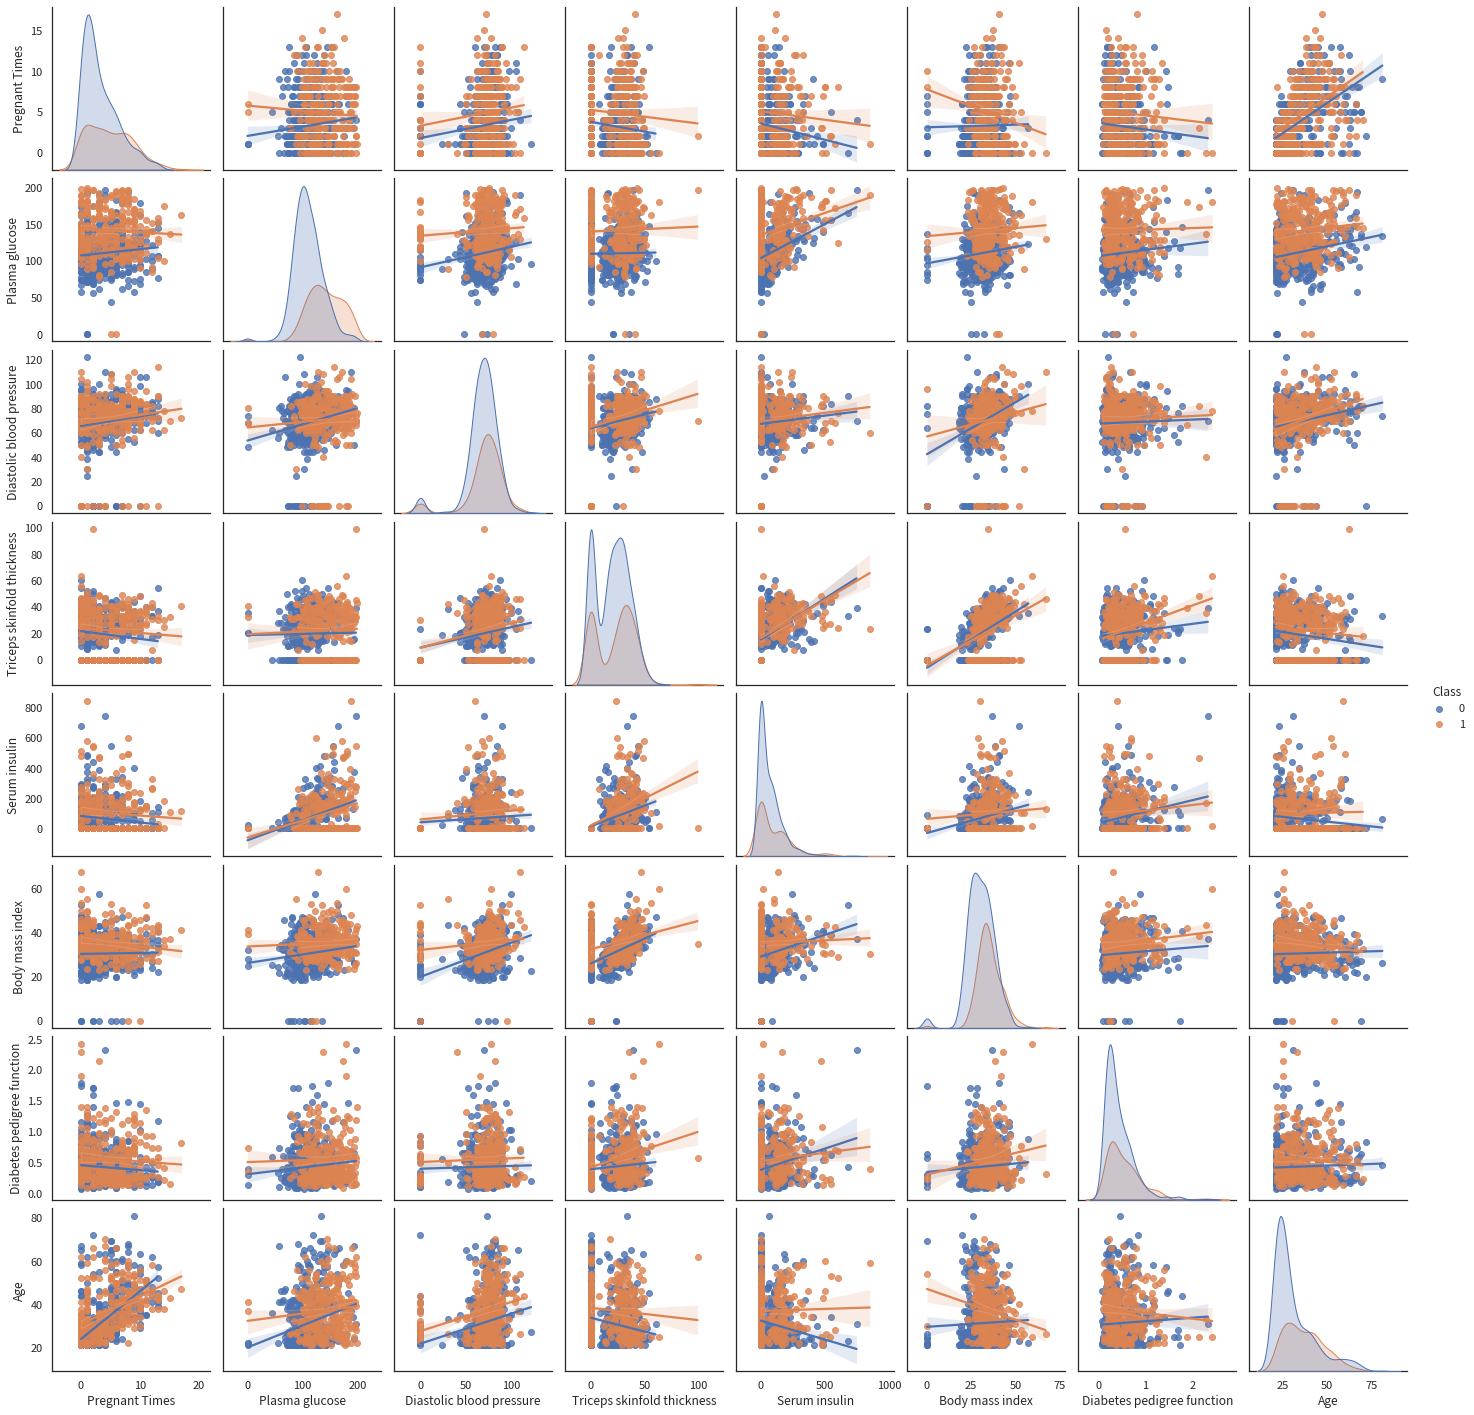

In [113]:
sns.pairplot(dataset, kind='reg',hue='Class')

![HdE1Qj](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/HdE1Qj.jpg)

我们使用数据集的相关性绘制热图(heatmap)。这有助于我们消除任何可能无助于预测的特征。

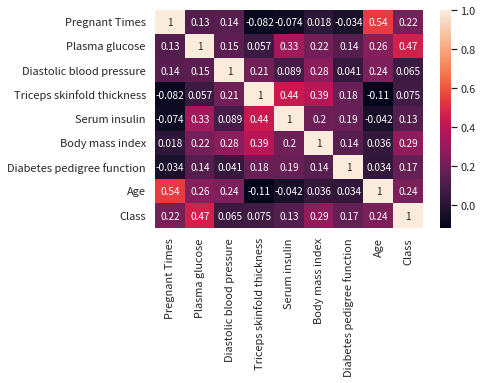

In [114]:
sns.heatmap(dataset.corr(), annot=True)

![tLZXxl](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/tLZXxl.jpg)

我们看到所有功能都与 Class 有某种关系，因此我们保留了所有功能。血浆葡萄糖(Plasma glucose)与分类/Class（是否患有糖尿病）的关系最强。年龄(Age)和体重指数(Body Mass Index)也是强大的影响因素。

现在我们了解了数据，让我们创建输入特征和目标变量，并通过预处理数据准备好将其输入到我们的神经网络中的数据。

In [115]:
# creating input features and target variables
X= dataset.iloc[:,0:8]
y= dataset.iloc[:,8]

让我们看看我们的输入特征

In [116]:
X.head(20)

,Pregnant Times,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,Serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


![QZogTg](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/QZogTg.jpg)

由于我们的输入特征处于不同的尺度(different scales)，我们需要对输入进行标准化(standardize)。

In [117]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [118]:
X.shape

(768, 8)

![VOcjLP](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/VOcjLP.jpg)

Standardized input features

我们现在将输入特征和目标变量拆分为训练数据集和测试数据集。测试数据集将占我们整个数据集的 30%。

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

我们已经对数据进行了预处理，现在可以构建神经网络(neural network)了。

我们正在使用 keras 来构建我们的神经网络。我们导入 keras 库来创建神经网络层。

keras 中有[两种主要的模型类型](https://keras.io/api/models/)——序列(Sequential)模型和模型。我们将使用序列模型来构建我们的神经网络。

我们使用 **Dense** 库来构建神经网络的输入、隐藏和输出层。

# 新段落

## 新段落 2

In [121]:
from keras import Sequential
from keras.layers import Dense

我们有 8 个输入特征(input features)和一个目标变量(one target variable)。 2 隐藏层(Hidden layers)。每个隐藏层将有 4 个节点(nodes)。

**ReLu** 将是隐藏层的激活函数。由于这是一个二元分类问题，我们将使用 **sigmoid** 作为激活函数。

密集层实现

**output = activation(dot(input, kernel) + bias)**

kernel 是权重矩阵。内核/kernel 初始化定义了设置 Keras 层的初始随机权重的方式。

随机正态初始化器生成具有正态分布的张量(Random normal initializer generates tensors with a normal distribution.)。

对于均匀分布，我们可以使用随机均匀初始化器。

Keras 为内核或权重以及偏置单元提供了多个初始化器。

![UZ1yky](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/UZ1yky.jpg)

In [122]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

一旦创建了不同的层，我们现在就编译神经网络。

由于这是一个二元分类问题，我们使用 **binary_crossentropy** 来计算实际输出和预测输出之间的损失函数。

为了优化我们的神经网络，我们使用 **Adam**。 

**Adam** 代表自适应矩估计(Adaptive moment estimation.)。 **Adam** 是 **RMSProp + Momentum** 的组合。

动量/Momentum 考虑了过去的梯度，以平滑梯度下降。

我们使用 准确性/accuracy 作为衡量模型性能的指标(measure the performance of the model)。

In [123]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

我们现在将训练数据拟合(fit out )到我们创建的模型中。我们使用 10 的 batch_size。这意味着我们每次梯度更新使用 10 个样本。

我们迭代了 100 多个 epoch 来训练模型。一个 epoch 是对整个数据集的迭代。

In [124]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
54/54 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.6480
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6592
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6592
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6592
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6592
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.6592
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.6983
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7486
Epoch 9/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.7616
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7784
Epoch 11/

在 100 个 epoch 之后，我们得到大约 80% 的准确率

![VzLBma](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/VzLBma.jpg)

我们还可以使用评估函数(evaluate function)在测试模式下评估模型的损失值( loss value)和指标值(metrics values for the model).

In [125]:
eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.7709


[0.4666070342063904, 0.7709497213363647]

我们现在预测(predict)测试数据集的输出。如果预测值(prediction)大于 0.5，则输出为 1，否则输出为 0

In [126]:
y_pred = classifier.predict(X_test)
y_pred =(y_pred>0.5)
print(y_pred)

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 

现在是关键时刻。我们检查测试数据集的准确性

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[127  19]
 [ 32  53]]


In [128]:
print((127+53)/(127+19+32+53))

0.7792207792207793


![exTbah](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/exTbah.jpg)

真阳性(true positive)和真阴性( true negative)的总数是测试数据集中 231 个观察值中的 179 个。所以我们对测试数据集的准确率约为 78%。

使用给定的输入，我们可以以 78% 的准确率预测该人是否患有糖尿病